# Problem 1

## Task 1

In [24]:
import pandas as pd
from sodapy import Socrata

In [25]:
graffiti_dataset_id = "cdmx-wzbz"
buildings_dataset_id = "yama-9had"
alley_dataset_id = "j9pw-ad5p"
building_date_range = "date_service_request_was_received between '2017-01-01T00:00:00.000' and '2017-12-31T00:00:00.000'"
graffiti_alley_date_range = "creation_date between '2017-01-01T00:00:00.000' and '2017-12-31T00:00:00.000'"

In [26]:
# Define Socrata client
client = Socrata("data.cityofchicago.org", None)

In [27]:
# Pull 311 data using Socrata client
graffiti_results = client.get(graffiti_dataset_id, where=graffiti_alley_date_range, limit = 150000)
building_results = client.get(buildings_dataset_id, where=building_date_range, limit = 5000)
alley_results = client.get(alley_dataset_id, where=graffiti_alley_date_range, limit = 30000)

In [28]:
# Convert to dataframes
graffiti_df = pd.DataFrame.from_records(graffiti_results, index='service_request_number')
building_df = pd.DataFrame.from_records(building_results, index='service_request_number')
alley_df = pd.DataFrame.from_records(alley_results, index='service_request_number')

In [29]:
# Combine address fields into 'street_address' column 
building_df['street_address']= (building_df['address_street_number'] + ' ' + 
                                building_df['address_street_direction'] + ' ' + 
                                building_df['address_street_name'] + ' ' + 
                                building_df['address_street_suffix'])
building_df['type_of_service_request'] = building_df['service_request_type']
building_df.drop(['address_street_number', 'address_street_direction', 
                  'address_street_name', 'address_street_suffix', 'service_request_type'], 
                 axis = 1, inplace = True)

In [30]:
# Merge dataframe
full_df = pd.concat([graffiti_df, building_df, alley_df])

In [31]:
# Convert date columns to datetime format
full_df['creation_date'] = pd.to_datetime(full_df['creation_date'])
full_df['completion_date'] = pd.to_datetime(full_df['completion_date'])
full_df['date_service_request_was_received'] = pd.to_datetime(full_df['date_service_request_was_received'])
full_df['response_time'] = full_df['completion_date'] - full_df['creation_date']

In [44]:
full_df['year'] = full_df['creation_date'].dt.year
full_df['year'].fillna(full_df['date_service_request_was_received'].dt.year, inplace = True)
full_df['month'] = full_df['creation_date'].dt.month
full_df['month'].fillna(full_df['date_service_request_was_received'].dt.month, inplace = True)

In [45]:
full_df[:10]

,any_people_using_property_homeless_childen_gangs_,community_area,completion_date,creation_date,date_service_request_was_received,if_the_building_is_open_where_is_the_entry_point_,is_building_open_or_boarded_,is_the_building_currently_vacant_or_occupied_,is_the_building_vacant_due_to_fire_,latitude,...,type_of_service_request,ward,what_type_of_surface_is_the_graffiti_on_,where_is_the_graffiti_located_,x_coordinate,y_coordinate,zip_code,response_time,year,month
service_request_number,,,,,,,,,,,,,,,,,,,,,
17-05251065,NaN,66,2017-08-07,2017-08-07,NaT,NaN,NaN,NaN,NaN,41.76386983154277,...,Graffiti Removal,18,Metal - Painted,Door,1160606.3195708,1857319.79946719,60629,0 days,2017.0,8.0
17-05196842,NaN,4,2017-08-07,2017-08-05,NaT,NaN,NaN,NaN,NaN,41.96162484771538,...,Graffiti Removal,47,Wood - Painted,Front,1159245.97991312,1929206.66469635,60625,2 days,2017.0,8.0
17-05248568,NaN,28,2017-08-07,2017-08-07,NaT,NaN,NaN,NaN,NaN,41.86497176596717,...,Graffiti Removal,28,Metal - Painted,Dumpster,1166057.81087376,1894135.42000548,60608,0 days,2017.0,8.0
17-05246644,NaN,21,2017-08-07,2017-08-07,NaT,NaN,NaN,NaN,NaN,41.94515063717326,...,Graffiti Removal,35,Metal - Painted,Dumpster,1154428.449525,1923227.687975,60618,0 days,2017.0,8.0
17-05201961,NaN,4,2017-08-07,2017-08-05,NaT,NaN,NaN,NaN,NaN,41.96306063501604,...,Graffiti Removal,47,Other/Unknown Surface,Garbage Cart,1160210.11016623,1929833.54508122,60625,2 days,2017.0,8.0
17-05194517,NaN,20,2017-08-07,2017-08-05,NaT,NaN,NaN,NaN,NaN,41.92705533134073,...,Graffiti Removal,31,Aluminum Siding,Alley,1145958.36982059,1916551.22010653,60639,2 days,2017.0,8.0
17-05197380,NaN,22,2017-08-07,2017-08-05,NaT,NaN,NaN,NaN,NaN,41.91512917985401,...,Graffiti Removal,32,Metal - Painted,Door,1160680.44779372,1912316.97737679,60647,2 days,2017.0,8.0
17-05203102,NaN,56,2017-08-07,2017-08-05,NaT,NaN,NaN,NaN,NaN,41.78838364548609,...,Graffiti Removal,13,Other/Unknown Surface,Alley,1131653.63100375,1865982.0165813,60638,2 days,2017.0,8.0
17-05249942,NaN,56,2017-08-07,2017-08-07,NaT,NaN,NaN,NaN,NaN,41.80018308981581,...,Graffiti Removal,14,Brick - Unpainted,Side,1145222.56478353,1870370.20420231,60632,0 days,2017.0,8.0


In [46]:
full_df['month'].unique()

array([ 8.,  5.,  2.,  6.,  4.,  7.,  9., 10., 11., 12.,  1.,  3.])

In [14]:
full_df.columns

Index(['any_people_using_property_homeless_childen_gangs_', 'community_area',
       'completion_date', 'creation_date', 'date_service_request_was_received',
       'if_the_building_is_open_where_is_the_entry_point_',
       'is_building_open_or_boarded_',
       'is_the_building_currently_vacant_or_occupied_',
       'is_the_building_vacant_due_to_fire_', 'latitude', 'location',
       'location_of_building_on_the_lot_if_garage_change_type_code_to_bgd_',
       'longitude', 'police_district', 'ssa', 'status', 'street_address',
       'type_of_service_request', 'ward',
       'what_type_of_surface_is_the_graffiti_on_',
       'where_is_the_graffiti_located_', 'x_coordinate', 'y_coordinate',
       'zip_code'],
      dtype='object')

## Task 2

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
frequency = result['type_of_service_request'].value_counts().to_frame()
frequency.reset_index(inplace = True)
frequency.rename({'index':'Type of Service Request',
                  'type_of_service_request': 'Count'}, 
                 axis = 1, inplace = True) 
frequency

/Users/claire/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Type and Frequency of 311 Service Requests, 2017')

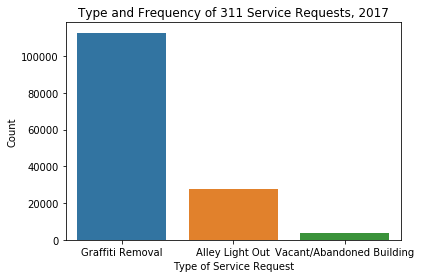

In [135]:
sns.barplot(x = 'Type of Service Request', y = 'Count', data=frequency)
plt.title("Type and Frequency of 311 Service Requests, 2017")

In [138]:
surface = (result[result['type_of_service_request'] == 'Graffiti Removal']
           ['what_type_of_surface_is_the_graffiti_on_']).value_counts().to_frame()
surface.reset_index(inplace = True)
surface.rename({'index':'Type of Surface Graffiti Is On',
                'what_type_of_surface_is_the_graffiti_on_': 'Count'}, 
               axis = 1, inplace = True)
surface

,Type of Surface Graffiti Is On,Count
0,Metal - Painted,40334
1,Brick - Unpainted,19492
2,Brick - Painted,14638
3,Metal - Unpainted,9962
4,"Cement (Sidewalk, Alley, Wall, Curb)",9220
5,Wood - Painted,4642
6,Aluminum Siding,3049
7,Glass,2643
8,Other/Unknown Surface,2259
9,Other / Unknown Surface,2063


/Users/claire/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


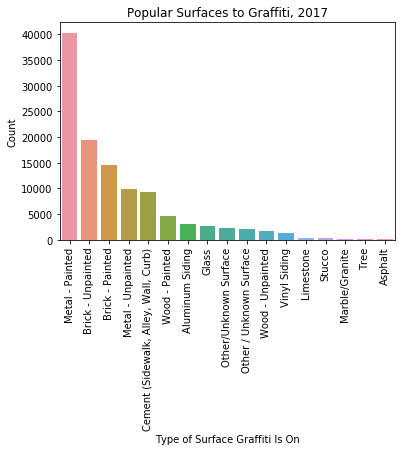

In [146]:
surface_plt = sns.barplot(x = 'Type of Surface Graffiti Is On', y = 'Count', data=surface)
plt.title("Popular Surfaces to Graffiti, 2017")
for item in surface_plt.get_xticklabels():
    item.set_rotation(90)

In [151]:
location = (result[result['type_of_service_request'] == 'Graffiti Removal']
       ['where_is_the_graffiti_located_']).value_counts().to_frame()
location.reset_index(inplace = True)
location.rename({'index':'Graffiti Location',
                'where_is_the_graffiti_located_': 'Count'}, 
               axis = 1, inplace = True)
location

,Graffiti Location,Count
0,Front,32568
1,Side,14877
2,Pole,13008
3,Garage,7997
4,Rear,6779
5,Alley,5949
6,Traffic Control Box,5444
7,Sign,5139
8,Door,4017
9,Dumpster,3760


/Users/claire/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


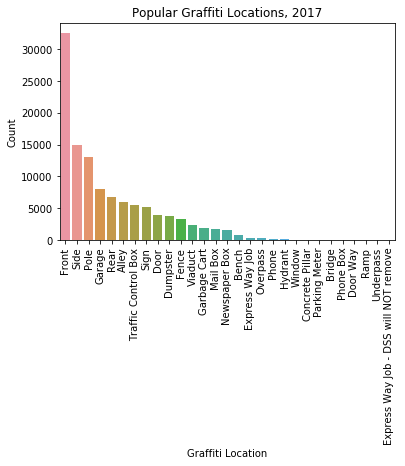

In [154]:
location_plt = sns.barplot(x = 'Graffiti Location', y = 'Count', data=location)
plt.title("Popular Graffiti Locations, 2017")
for item in location_plt.get_xticklabels():
    item.set_rotation(90)